In [13]:
import os
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString
import xyzservices.providers as xyz
import contextily as ctx
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from shapely.geometry import Point, Polygon
import seaborn as sns
import folium
import tqdm
from matplotlib_scalebar.scalebar import ScaleBar

In [14]:
# specify the project directory and file paths
geopackage_fn = '/home/jovyan/project/columbia-drivt/Data/col_drivt_data.gpkg'

grwl_fn =  '/home/jovyan/project/columbia-drivt/Data/GRWL_summaryStats_V01.01/GRWL_summaryStats.shp' # specify the path to the GRWL file
grand_reservoir_fn = '/home/jovyan/project/columbia-drivt/Data/GRanD_Version_1_3/GRanD_reservoirs_v1_3.shp' 

In [15]:
#!gdalsrsinfo /home/jovyan/project/columbia-drivt/Data/col_drivt_data.gpkg

In [16]:
basins = gpd.read_file(geopackage_fn, layer="Basins") # read the layer "Basins" from the geopackage
rivers = gpd.read_file(geopackage_fn, layer="Rivers") # read the layer "Rivers" from the geopackage

# col_river = rivers[rivers["GNIS_Name"] == "Columbia River"]
grwl = gpd.read_file(grwl_fn)
reservoirs = gpd.read_file(grand_reservoir_fn)

In [17]:
# check the crs of the basins and rivers layers
print(f"Basins crs: {basins.crs}")
print(f"Rivers crs: {rivers.crs}")
print(f"GRWL crs: {grwl.crs}")
print(f"Reservoirs crs: {reservoirs.crs}")

Basins crs: EPSG:4326
Rivers crs: EPSG:4326
GRWL crs: EPSG:4326
Reservoirs crs: EPSG:4326


In [18]:
# select the Columbia river basin from the basins layer
# The HUC4 code for the Columbia river basin is 1701
col_basin = basins[basins["HUC4"] == "1701"]

# select the Columbia River from the rivers layer
# The Columbia River is the only river in the dataset with the GNIS_NAME "Columbia River"
col_river = rivers[rivers["GNIS_Name"] == "Columbia River"]

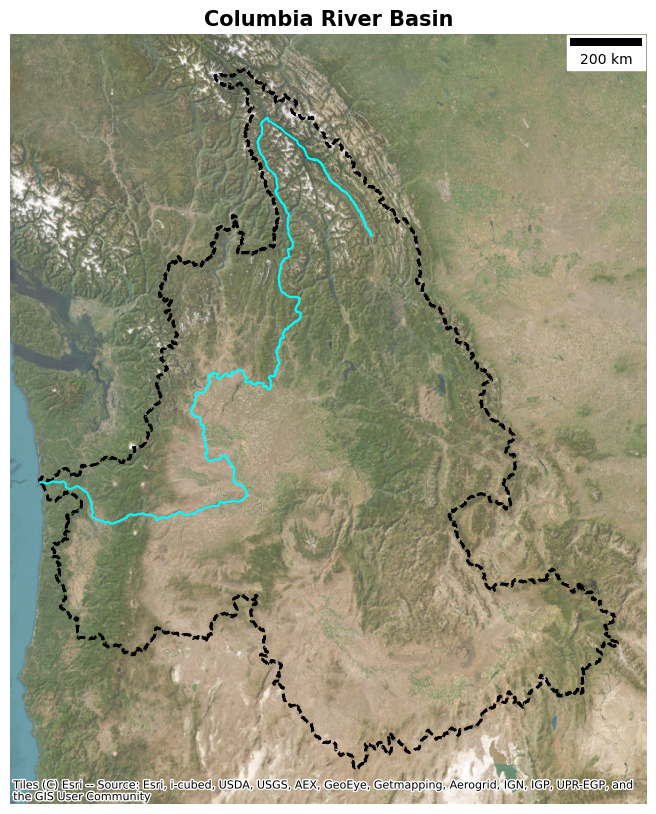

In [19]:
# Plot
fig, ax = plt.subplots(figsize=(10, 10))
# Overlay the outline of Basin
col_basin.to_crs(3857).boundary.plot(ax=ax, 
                                     edgecolor='black',
                                     linestyle='--',
                                     linewidth=2
                      )
# Plot River
col_river.to_crs(3857).plot(ax=ax, 
               color="aqua"
              )

# Plot basemap
ctx.add_basemap(ax,
                crs=col_river.to_crs(3857).crs,
                source=ctx.providers.Esri.WorldImagery,
                alpha=0.7
               )


# Remove axis clutter
ax.set_axis_off()
# Add a dynamic scalebar
scalebar = ScaleBar(1.0, location='upper right') 
ax.add_artist(scalebar)

plt.title("Columbia River Basin", fontsize=15, fontweight='bold' )
plt.show()